<a href="https://colab.research.google.com/github/PaceyA/Movies/blob/main/PandasTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/drive")
path = "/content/drive/MyDrive/CSV Data/movieDataset.csv"
df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head(5)
above8 = df[df['Vote Average'] >= 8]
above8.head()
#above8.shape()

,Release Date,Title,Overview,Genre,Vote Average,Vote Count
18,1925-07-12,The Gold Rush,A lone prospector ventures into Alaska looking...,"['Adventure', 'Comedy', 'Drama']",8.0,1207
26,1927-09-16,Ghost Train,Mismatched travellers are stranded overnight a...,['Crime'],8.0,2
86,1941-04-17,Citizen Kane,"Newspaper magnate, Charles Foster Kane is take...","['Mystery', 'Drama']",8.0,4459
161,1948-03-11,Rope,Two men attempt to prove they committed the pe...,"['Crime', 'Drama', 'Thriller']",8.0,2084
178,1948-11-24,Bicycle Thieves,A working man's livelihood is threatened when ...,['Drama'],8.3,1862


In [ ]:
title_genre = df[["Title","Genre"]]

title_genre.head()

,Title,Genre
0,Agnes May Turner on a Swing,['Documentary']
1,Scarlet Macaw on Perch,['Documentary']
2,Kiri-Kis,"['Comedy', 'Fantasy']"
3,The Birth of a Nation,"['Drama', 'History', 'War']"
4,One A.M.,['Comedy']


In [ ]:
comedies = df.loc[(df["Genre"].str.contains("Comedy")) & (df['Vote Average']>8)]
comedies.head()

,Release Date,Title,Overview,Genre,Vote Average,Vote Count
461,1961-12-19,A Difficult Life,Silvio refuses to fight for the fascists and j...,['Comedy'],8.2,91
508,1963-06-18,World Gone Mad,This classic Greek comedy revolves around the ...,['Comedy'],8.1,22
889,1973-06-15,The School of Mischief,This play is about a female teacher and how sh...,['Comedy'],8.5,14
944,1974-12-21,We All Loved Each Other So Much,Three partisans bound by a strong friendship r...,"['Drama', 'Comedy']",8.3,424
1105,1979-02-05,"Uncle Marin, the Billionaire","At a swanky hotel in a Black Sea resort, Gogu,...",['Comedy'],8.3,24


In [ ]:
releaseYear = df["Release Date"].str[:4]
df["Year"] = releaseYear
df[["Title","Genre","Year"]].head()

,Title,Genre,Year
0,Agnes May Turner on a Swing,['Documentary'],1902
1,Scarlet Macaw on Perch,['Documentary'],1902
2,Kiri-Kis,"['Comedy', 'Fantasy']",1907
3,The Birth of a Nation,"['Drama', 'History', 'War']",1915
4,One A.M.,['Comedy'],1916


In [ ]:
meanScore = df["Vote Average"].mean()

df.agg(
    {
        "Vote Average" : ["min","max","mean"],
        "Vote Count"  : ["min","max","mean"]
    }

)

,Vote Average,Vote Count
min,0.000000,0.000000
max,10.000000,21370.000000
mean,4.812911,90.063399


In [ ]:
genre = "Action"
avgByGenre = df[["Genre","Vote Average"]].groupby("Genre").mean()
#avgByGenre.sort_values(by="Vote Average",ascending=False).head(20)
avgByGenre.head()

,Vote Average
Genre,
"['Action', 'Adventure', 'Animation', 'Comedy', 'Family']",6.40
"['Action', 'Adventure', 'Animation', 'Crime', 'Science Fiction', 'Thriller']",7.10
"['Action', 'Adventure', 'Animation', 'Crime', 'Science Fiction']",5.50
"['Action', 'Adventure', 'Animation', 'Crime']",7.00
"['Action', 'Adventure', 'Animation', 'Documentary', 'Family', 'History']",7.25


6.480200000000001


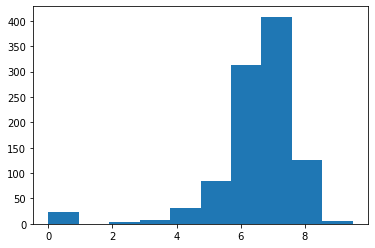

In [ ]:
voteAverage = df["Vote Average"].head(1000)
voteCount = df["Vote Count"].head(1000)
plt.hist(voteAverage)
print((voteAverage).mean())
#plt.scatter(voteAverage,voteCount)